# Market Segmentation Example

### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.cluster import KMeans

### Load the Data

In [2]:
data = pd.read_csv('11. 3.12.Example.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


#### Plot the data

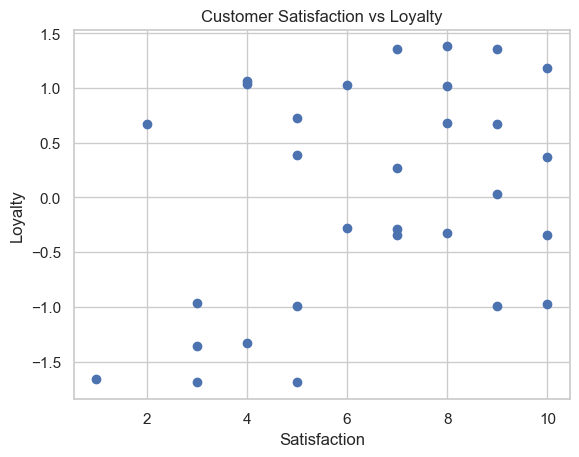

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.title('Customer Satisfaction vs Loyalty')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

#### Select Features

In [5]:
x = data.copy()

### Clustering

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


## Cluster Results

In [7]:
clusters = x.copy()
clusters['cluster_predict'] = kmeans.fit_predict(x)

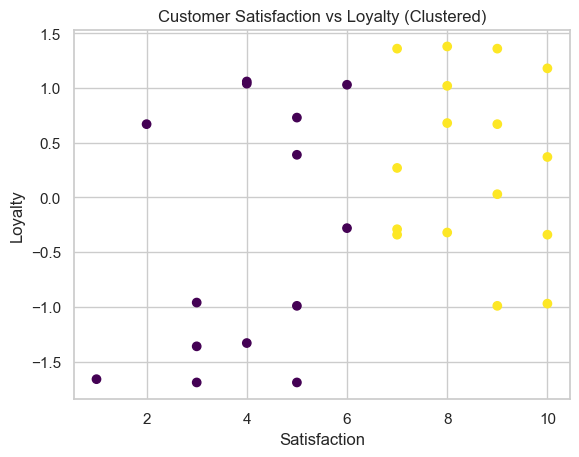

In [8]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_predict'], cmap='viridis')
plt.title('Customer Satisfaction vs Loyalty (Clustered)')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

## Standerdize Varibles

In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of the Elbow method

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[59.99999999999999,
 30.35236058808774,
 18.129659446063226,
 10.426343601027586,
 7.792695153937187,
 7.1677148857235355,
 5.627307718355488,
 5.212654800617851,
 3.7851748501515035,
 3.59810363021115]

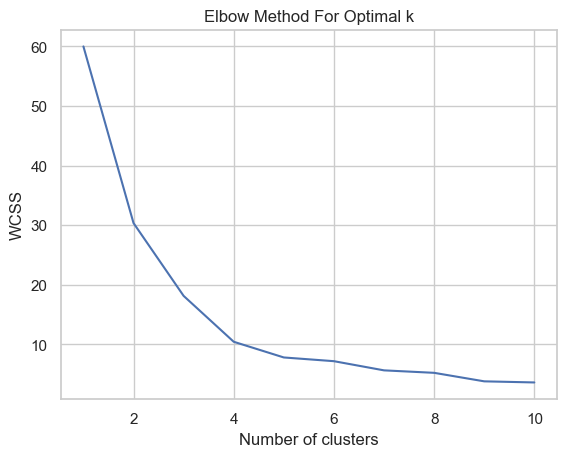

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Explore clustering solutions and select the number of clusters

In [12]:
kmeans_new = KMeans(n_clusters=4)
kmeans_new.fit(x_scaled)

clusters_new = x.copy()
clusters_new['cluster_predict'] = kmeans_new.fit_predict(x_scaled)

In [13]:
clusters_new

,Satisfaction,Loyalty,cluster_predict
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,0
8,8,1.02,2
9,8,0.68,2


# Final Clustering

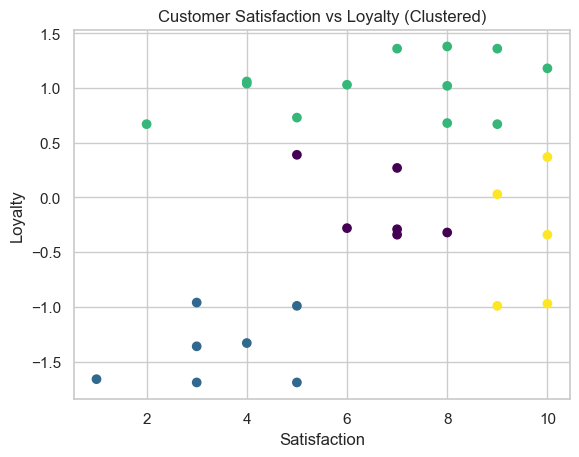

In [14]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_predict'], cmap='viridis')
plt.title('Customer Satisfaction vs Loyalty (Clustered)')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [15]:
clusters_new

,Satisfaction,Loyalty,cluster_predict
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,3
7,8,-0.32,0
8,8,1.02,2
9,8,0.68,2
